In [244]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import pandas as pd 
import scipy as sp 
import time
from mpl_toolkits.mplot3d import Axes3D

from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Imputer


from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [290]:
#removed date labels, layer, vrest, adaptation and sag amplitude from ephys features file
df_ephys = pd.read_csv('ephys_features_pca2.csv')
pd.DataFrame(df_ephys).head()

,Fluorescence,Input Resistance (megaohm),Cell Capacitance (pF),Membrane Time Constant (ms),Rheobase (nA),fI slope (Hz/nA),Spike Threshold (mV),Spike Amplitude (mV),Spike Halfwidth (ms),Sag Amplitude (mV)
0,NF,120.465310,64.435931,7.762294,0.300148,1125.000000,-34.019689,53.479829,0.436893,2.212378
1,NF,231.269244,77.661610,17.960742,0.040000,8.928571,-26.516383,95.350470,0.877778,0.531746
2,NF,123.167530,167.826517,20.670778,0.090909,110.000000,-33.264157,99.945059,0.924242,2.579814
3,PV+,228.141043,31.488151,7.183740,0.099039,1144.999998,-38.985499,70.530813,0.412769,1.616816
4,PV+,182.081957,48.163386,8.769684,0.101233,872.857142,-35.196936,66.866065,0.386330,1.988266


In [291]:
#mean ephys features for each fluorescence group
df_ephys.groupby('Fluorescence').mean().round(2)

,Input Resistance (megaohm),Cell Capacitance (pF),Membrane Time Constant (ms),Rheobase (nA),fI slope (Hz/nA),Spike Threshold (mV),Spike Amplitude (mV),Spike Halfwidth (ms),Sag Amplitude (mV)
Fluorescence,,,,,,,,,
NF,177.44,101.89,16.93,0.09,289.05,-31.42,81.91,0.80,5.18
PV+,148.88,64.36,8.99,0.18,940.06,-34.26,65.42,0.38,2.68
SST+,226.28,76.81,16.41,0.05,430.88,-30.41,64.91,0.67,5.35


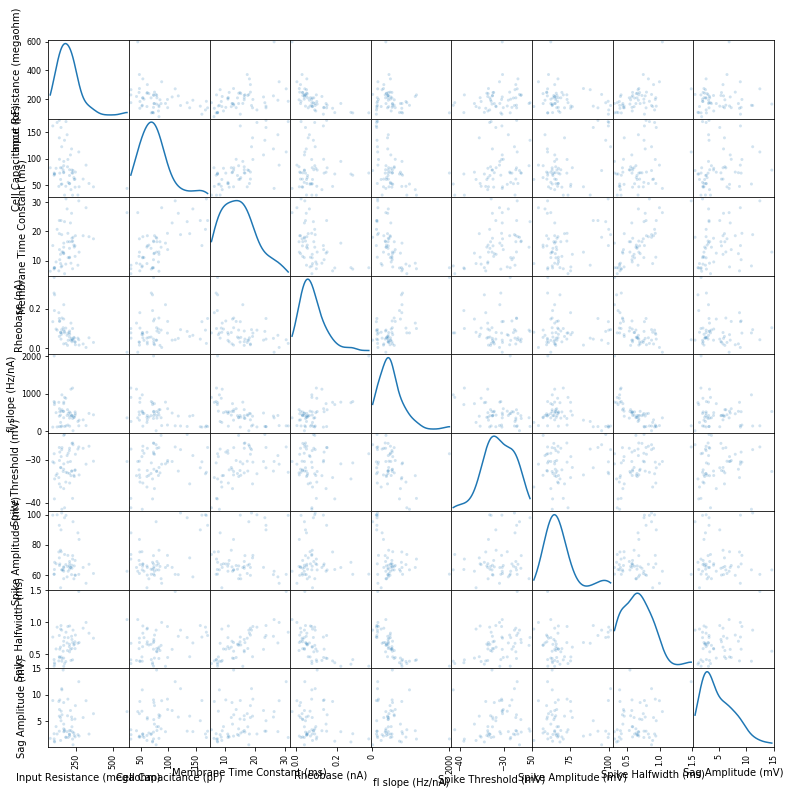

In [292]:
'''display which features are correlated with each other, based upon qualitative vis, removed vrest, adaptation
and sag amplitude from features and final analysis'''
scatter_matrix(df_ephys[1:],alpha=0.2,figsize=(13,13), diagonal='kde')
plt.savefig('ephys_scatter_matrix.svg')

In [293]:
features = df_ephys.columns.values[1:]
x = df_ephys.loc[:,features].values
y = df_ephys.loc[:,['Fluorescence']].values

#standardize data, used Imputer to handle NaN entries
imp = Imputer(strategy="mean", axis=0)
scale = StandardScaler()
x = scale.fit_transform(imp.fit_transform(x))
pd.DataFrame(data = x, columns = features).head()

,Input Resistance (megaohm),Cell Capacitance (pF),Membrane Time Constant (ms),Rheobase (nA),fI slope (Hz/nA),Spike Threshold (mV),Spike Amplitude (mV),Spike Halfwidth (ms),Sag Amplitude (mV)
0,-1.010123,-0.512095,-1.201667,3.016715,2.064714,-0.724096,-1.416825,-1.054827,-0.862110
1,0.462567,-0.115279,0.479999,-0.702556,-1.540822,1.378977,2.176870,1.084536,-1.414800
2,-0.974208,2.589974,0.926869,0.025278,-1.214305,-0.512331,2.571216,1.310002,-0.741276
3,0.420991,-1.500640,-1.297067,0.141513,2.129325,-2.115944,0.046635,-1.171887,-1.057966
4,-0.191179,-1.000326,-1.035554,0.172875,1.250151,-1.054062,-0.267905,-1.300184,-0.935811


In [294]:
#run PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head(5)

,principal component 1,principal component 2,principal component 3
0,4.016160,-0.590275,0.411199
1,-2.305045,-0.639631,-2.417813
2,-2.285708,-3.188206,-1.039252
3,3.132509,1.192236,-0.912014
4,2.467948,0.540449,-0.708051


In [295]:
#concatenate PCA values to fluorescent cell
finalDf = pd.concat([principalDf, df_ephys[['Fluorescence']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,principal component 3,Fluorescence
0,4.016160,-0.590275,0.411199,NF
1,-2.305045,-0.639631,-2.417813,NF
2,-2.285708,-3.188206,-1.039252,NF
3,3.132509,1.192236,-0.912014,PV+
4,2.467948,0.540449,-0.708051,PV+


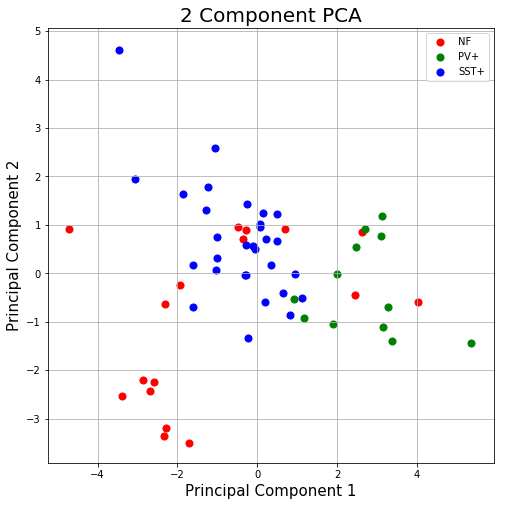

In [296]:
#2 component PCA plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


Fluorescence = ['NF', 'PV+', 'SST+']
colors = ['r', 'g', 'b']
for target, color in zip(Fluorescence,colors):
    indicesToKeep = finalDf['Fluorescence'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(Fluorescence)
ax.grid()
fig.savefig('ephys_2comp_pca'+(time.strftime("%d-%m-%Y-%H-%M-%S"))+'.svg')

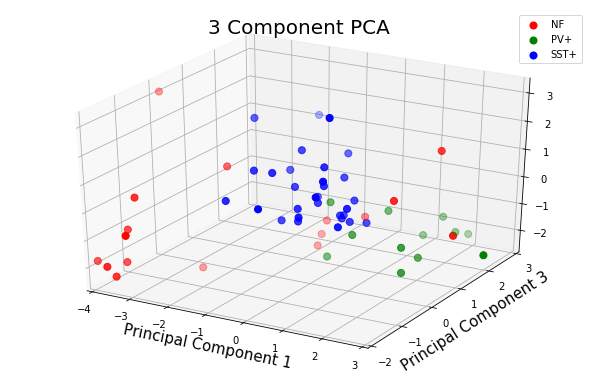

In [297]:
# 3 component PCA plot
fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)

Fluorescence = ['NF', 'PV+', 'SST+']
colors = ['r', 'g', 'b']
for target, color in zip(Fluorescence,colors):
    indicesToKeep = finalDf['Fluorescence'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
    
plt.xlim(-4, 3) 
plt.ylim(-2, 3) 
ax.legend(Fluorescence)
ax.grid()
fig.savefig('ephys_3comp_pca'+(time.strftime("%d-%m-%Y-%H-%M-%S"))+'.svg')

In [298]:
#find how much variance 3 PCA components capture
pca.explained_variance_ratio_

array([0.41443236, 0.20520189, 0.11103643])

In [299]:
df_ephys2 = pd.read_csv('ephys_features_pca2.csv', header=None, usecols=[1,2,3,4,5,6,7,8,9])
df_ephys2 = df_ephys2.drop(df_ephys2.index[0])

print x

[[-1.01012273e+00 -5.12094671e-01 -1.20166691e+00  3.01671503e+00
   2.06471366e+00 -7.24095794e-01 -1.41682544e+00 -1.05482711e+00
  -8.62110376e-01]
 [ 4.62567372e-01 -1.15279377e-01  4.79999196e-01 -7.02556499e-01
  -1.54082188e+00  1.37897735e+00  2.17686953e+00  1.08453553e+00
  -1.41479988e+00]
 [-9.74207640e-01  2.58997411e+00  9.26868711e-01  2.52777530e-02
  -1.21430459e+00 -5.12330650e-01  2.57121633e+00  1.31000208e+00
  -7.41275958e-01]
 [ 4.20990589e-01 -1.50064000e+00 -1.29706732e+00  1.41513286e-01
   2.12932485e+00 -2.11594393e+00  4.66352253e-02 -1.17188706e+00
  -1.05796588e+00]
 [-1.91178650e-01 -1.00032630e+00 -1.03555415e+00  1.72875339e-01
   1.25015107e+00 -1.05406203e+00 -2.67904667e-01 -1.30018364e+00
  -9.35811238e-01]
 [-7.78073204e-01  2.70806954e+00  1.42476613e+00  8.70085364e-01
  -1.18199899e+00  1.19840015e+00  1.97140173e+00  6.78009514e-01
  -5.67522192e-01]
 [-1.21988103e+00 -3.09460551e-01 -1.25277260e+00  1.44702490e+00
   7.07878529e-01 -2.1485993

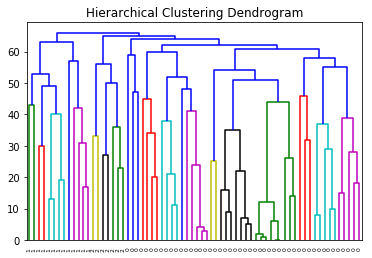

In [302]:
#dendorgram analysis and plot
#used 'x' data set which is the standardized data of ephys features (accounts for nan entries)

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(n_clusters=3)

model = model.fit(x)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)
plt.savefig('ephys_dendrogram'+(time.strftime("%d-%m-%Y-%H-%M-%S"))+'.svg')

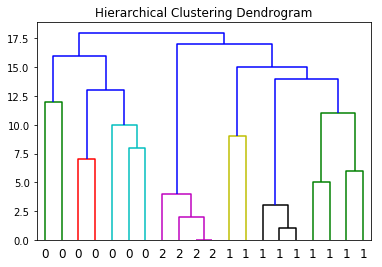

In [303]:
# running sample dendrogram to compare with ephys features dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
x = iris.data[:20]
model = AgglomerativeClustering(n_clusters=3)

model = model.fit(x)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)
plt.show()